In [2417]:
from sys import path
from sklearn.metrics import mean_squared_error as mse
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Adding KELMOR.py to the path
path.append("KELMOR.py") # Replace . by the folder that contains KELMOR.py

# Import KELMOR module and class
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

# Load the dataset
DKI1 = pd.read_excel("DATA_Normalization_forecast.xlsx", sheet_name="DKI1")
X = DKI1.index.values.reshape(-1, 1)
y = DKI1['PM10'].values.reshape(-1,)
# Perform K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True)
rmse_scores = []
for train_inds, test_inds in kfold.split(X, y):
    X_train, y_train = X[train_inds, :], y[train_inds]
    X_test, y_test = X[test_inds, :], y[test_inds]
    
    # Train KELMOR on the dataset
    gamma_value = 0.06
    kelmor = KELMOR(C=10, kernel="laplacian", gamma=gamma_value)
    kelmor.fit(X_train, y_train)

    # Forecasting future samples
    num_forecast = 30  # Number of samples to forecast
    X_future = np.array([X_test[-1, :]])  # Use the last sample as initial input

    forecasted_samples = []
    for _ in range(num_forecast):
        y_pred = kelmor.predict(X_future)
        forecasted_samples.append(y_pred)
        X_future = np.array([np.concatenate((X_future[0, 1:], y_pred))])

    # Mean absolute error of the forecasting
    ytst_forecast = y_test[:num_forecast]
    forecast_error = np.sqrt(mse(ytst_forecast, forecasted_samples))
    rmse_scores.append(forecast_error)

average_rmse = np.mean(rmse_scores)
print(average_rmse)

0.2582402506814545


In [2418]:
forecasted_samples = np.array(forecasted_samples).flatten()  # Flatten the list of forecasted samples
forecast_df = pd.DataFrame({'Forecast': forecasted_samples})  # Create a DataFrame with the forecasted samples
print(forecast_df)

    Forecast
0   0.512195
1   0.341463
2   0.378049
3   0.378049
4   0.378049
5   0.378049
6   0.378049
7   0.378049
8   0.378049
9   0.378049
10  0.378049
11  0.378049
12  0.378049
13  0.378049
14  0.378049
15  0.378049
16  0.378049
17  0.378049
18  0.378049
19  0.378049
20  0.378049
21  0.378049
22  0.378049
23  0.378049
24  0.378049
25  0.378049
26  0.378049
27  0.378049
28  0.378049
29  0.378049


In [2419]:
import pandas as pd
import numpy as np

# Menggabungkan data asli dengan hasil forecasting
data_asli = pd.DataFrame({'Data Asli': np.concatenate((y_test, [np.nan] * num_forecast))})
forecast_df = pd.DataFrame({'Forecast': np.concatenate(([np.nan] * len(y_test), forecasted_samples))})
result_df = pd.concat([data_asli, forecast_df], axis=1)

# Menampilkan data sebelum forecasting sampai hasil forecasting
print(result_df)


     Data Asli  Forecast
0     0.170732       NaN
1     0.414634       NaN
2     0.545634       NaN
3     0.243902       NaN
4     0.609756       NaN
..         ...       ...
371        NaN  0.378049
372        NaN  0.378049
373        NaN  0.378049
374        NaN  0.378049
375        NaN  0.378049

[376 rows x 2 columns]


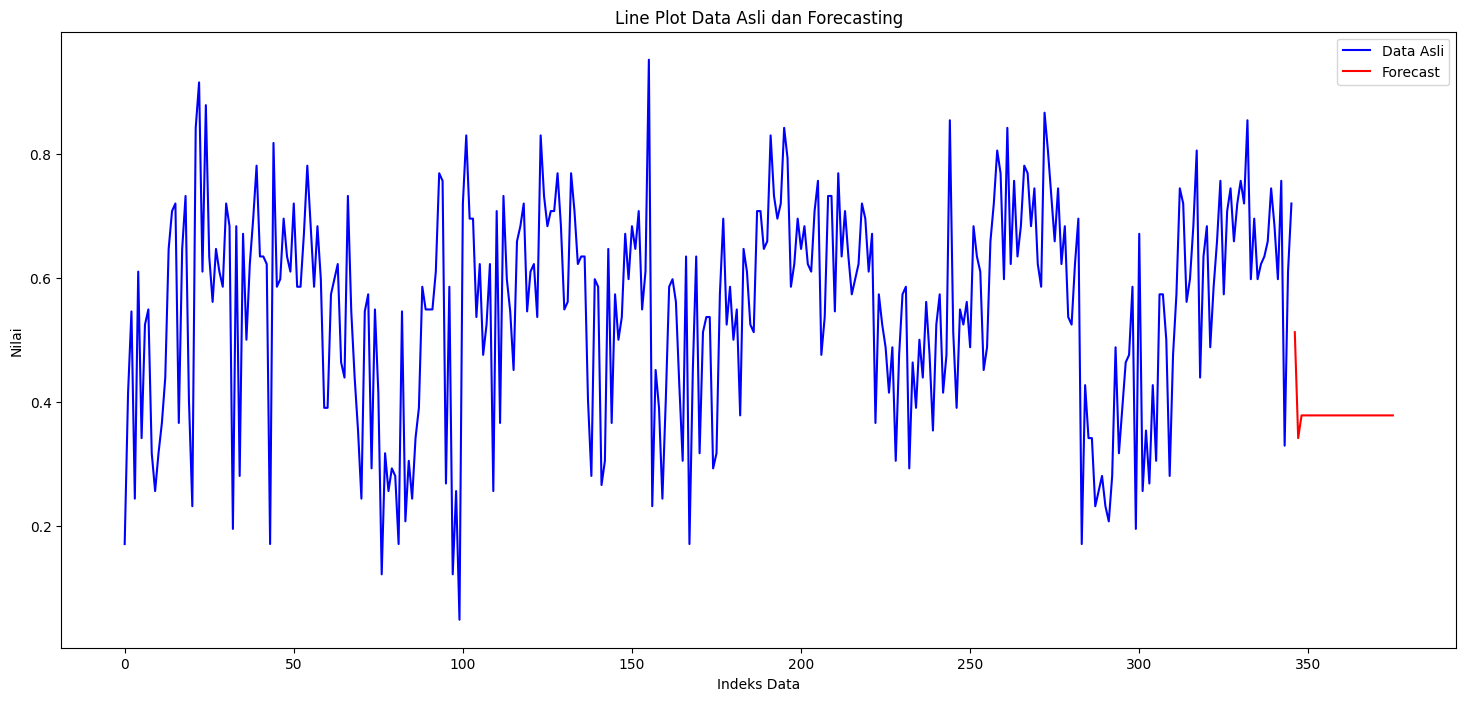

In [2420]:
import matplotlib.pyplot as plt

# Menggabungkan data asli dengan hasil forecasting
data_asli = np.concatenate((y_test, [np.nan] * num_forecast))
forecast_data = np.concatenate(([np.nan] * len(y_test), forecasted_samples))

# Plot data asli dan hasil forecasting
plt.figure(figsize=(18, 8))
plt.plot(range(len(data_asli)), data_asli, c='b', label='Data Asli')
plt.plot(range(len(forecast_data)), forecast_data, c='r', label='Forecast')

plt.xlabel('Indeks Data')
plt.ylabel('Nilai')
plt.title('Line Plot Data Asli dan Forecasting')
plt.legend()
plt.show()


In [2421]:
import pandas as pd
import numpy as np

# Menggabungkan data asli dengan hasil forecasting
tanggal_asli = pd.DataFrame({'Tanggal': np.array(DKI1['Tanggal'].loc[X_test.flatten()]).reshape(-1, 1).flatten()})
data_asli = pd.DataFrame({'Data Asli': np.concatenate((y_test, [np.nan] * num_forecast))})
forecast_df = pd.DataFrame({'Forecast': np.concatenate(([np.nan] * len(y_test), forecasted_samples))})
result_df = pd.concat([tanggal_asli, data_asli, forecast_df], axis=1)

# Menampilkan data sebelum forecasting sampai hasil forecasting
print(result_df)

       Tanggal  Data Asli  Forecast
0   2017-01-03   0.170732       NaN
1   2017-01-10   0.414634       NaN
2   2017-01-17   0.545634       NaN
3   2017-01-18   0.243902       NaN
4   2017-01-22   0.609756       NaN
..         ...        ...       ...
371        NaT        NaN  0.378049
372        NaT        NaN  0.378049
373        NaT        NaN  0.378049
374        NaT        NaN  0.378049
375        NaT        NaN  0.378049

[376 rows x 3 columns]


In [2422]:
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_test.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast+1, freq='D')[1:]
forecast_df = pd.DataFrame({'PM10': forecasted_samples})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Menampilkan data sebelum forecasting sampai hasil forecasting
print(result_df)


      Tanggal      PM10
0  2021-10-01  0.512195
1  2021-10-02  0.341463
2  2021-10-03  0.378049
3  2021-10-04  0.378049
4  2021-10-05  0.378049
5  2021-10-06  0.378049
6  2021-10-07  0.378049
7  2021-10-08  0.378049
8  2021-10-09  0.378049
9  2021-10-10  0.378049
10 2021-10-11  0.378049
11 2021-10-12  0.378049
12 2021-10-13  0.378049
13 2021-10-14  0.378049
14 2021-10-15  0.378049
15 2021-10-16  0.378049
16 2021-10-17  0.378049
17 2021-10-18  0.378049
18 2021-10-19  0.378049
19 2021-10-20  0.378049
20 2021-10-21  0.378049
21 2021-10-22  0.378049
22 2021-10-23  0.378049
23 2021-10-24  0.378049
24 2021-10-25  0.378049
25 2021-10-26  0.378049
26 2021-10-27  0.378049
27 2021-10-28  0.378049
28 2021-10-29  0.378049
29 2021-10-30  0.378049


In [2423]:
# Menampilkan min dan max partikel
min_par = DKI1['PM10'].min()
max_par = DKI1['PM10'].max()

print("Nilai maksimum Partikel :", max_par)
print("Nilai minimum Partikel :", min_par)

Nilai maksimum Partikel : 1.0
Nilai minimum Partikel : 0.0


In [2424]:
max_value = 100.0
min_value = 0.0
datas = (data_asli * (max_value - min_value) + min_value)
forecast_df = (forecasted_samples.flatten() * (max_value - min_value) + min_value)
date = np.array(DKI1['Tanggal'].loc[X_test.flatten()]).reshape(-1, 1)

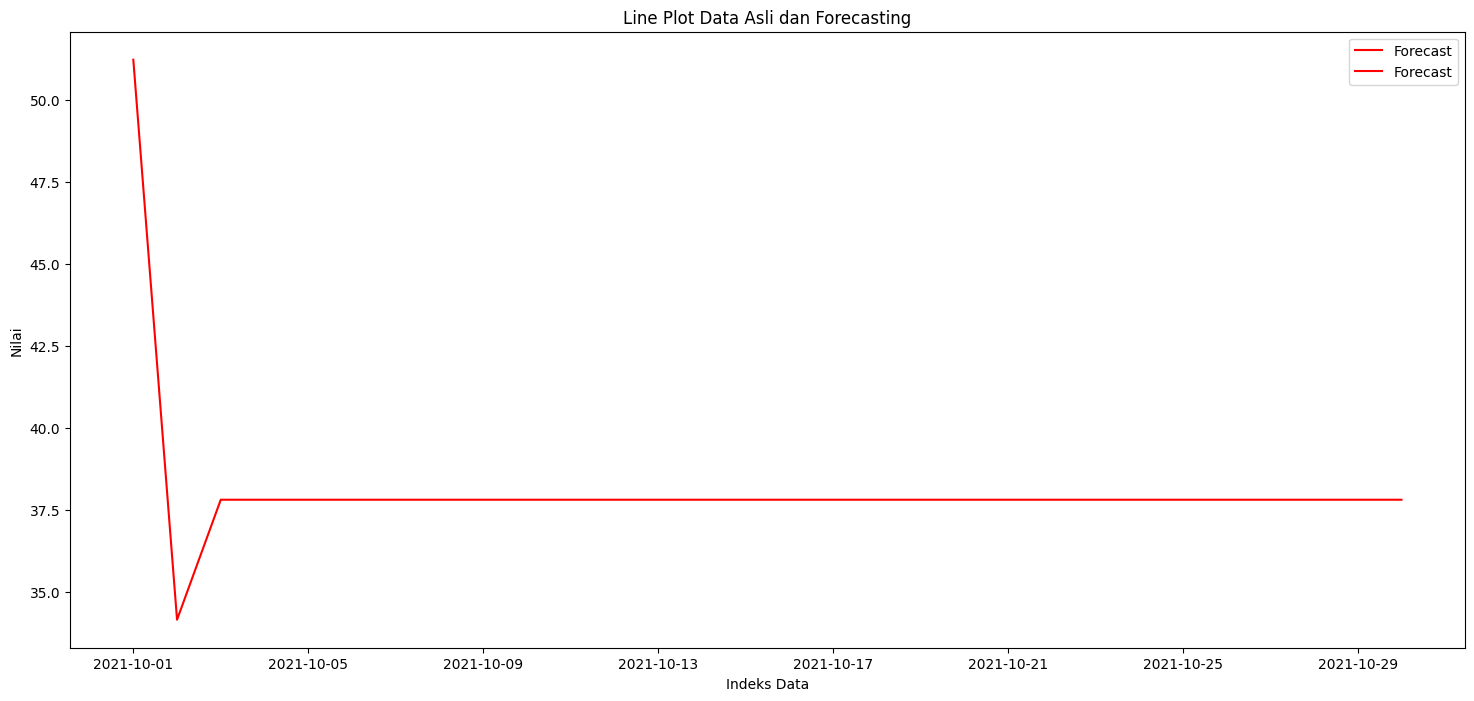

In [2425]:
import matplotlib.pyplot as plt

# Menggabungkan data asli dengan hasil forecasting
data_asli = np.concatenate((y_test, [np.nan] * num_forecast))
forecast_data = np.concatenate(([np.nan] * len(y_test), forecasted_samples))

# Plot data asli dan hasil forecasting
plt.figure(figsize=(18, 8))
#plt.plot(tanggal_asli[:len(data_asli)], datas[:len(y_test)], c='b', label='Data Asli')
plt.plot(tanggal_forecast[:len(forecast_data)], forecast_data[:len(forecasted_samples)], c='r', label='Forecast')
plt.plot(tanggal_forecast, forecast_df, c='r', label='Forecast')
plt.xlabel('Indeks Data')
plt.ylabel('Nilai')
plt.title('Line Plot Data Asli dan Forecasting')
plt.legend()
plt.show()


In [2426]:
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_test.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast+1, freq='D')[1:]
forecast_df = pd.DataFrame({'PM10': forecast_df})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Menampilkan data sebelum forecasting sampai hasil forecasting
print(result_df)

      Tanggal       PM10
0  2021-10-01  51.219512
1  2021-10-02  34.146341
2  2021-10-03  37.804878
3  2021-10-04  37.804878
4  2021-10-05  37.804878
5  2021-10-06  37.804878
6  2021-10-07  37.804878
7  2021-10-08  37.804878
8  2021-10-09  37.804878
9  2021-10-10  37.804878
10 2021-10-11  37.804878
11 2021-10-12  37.804878
12 2021-10-13  37.804878
13 2021-10-14  37.804878
14 2021-10-15  37.804878
15 2021-10-16  37.804878
16 2021-10-17  37.804878
17 2021-10-18  37.804878
18 2021-10-19  37.804878
19 2021-10-20  37.804878
20 2021-10-21  37.804878
21 2021-10-22  37.804878
22 2021-10-23  37.804878
23 2021-10-24  37.804878
24 2021-10-25  37.804878
25 2021-10-26  37.804878
26 2021-10-27  37.804878
27 2021-10-28  37.804878
28 2021-10-29  37.804878
29 2021-10-30  37.804878


In [2427]:
# Menyimpan DataFrame ke dalam file Excel
#results_df.to_excel('C:/OBIE/Tel - U/SEM 7/PTA/BISMILLAH/Code/TA_COBA_KELM1/Forecasting/PM10_Forecast.xlsx', index=False)